In [61]:
import pandas as pd
import math
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn.preprocessing as pre
from sklearn.pipeline import Pipeline

x = pd.read_csv(open('/Users/vishwas/Desktop/da_pro/DATA/dengue_features_train.csv', 'r'))
y = pd.read_csv(open('/Users/vishwas/Desktop/da_pro/DATA/dengue_labels_train.csv', 'r'))

def remove_null(x):
    t_f=pd.isnull(x)
    for i in t_f:
        c=0
        if(i=='city' or i=='week_start_date'):
            continue 
        mean_value=x[i].mean()
        x[i].fillna(value=mean_value, inplace=True)
    


iq=x[x.city == "iq"]
sj=x[x.city == "sj"]
liq=y[y.city == "iq"]
lsj=y[y.city == "sj"]

iq=iq.drop(['city'], axis = 1)
sj=sj.drop(['city'], axis = 1)
iq=iq.drop(['week_start_date'], axis = 1)
sj=sj.drop(['week_start_date'], axis = 1)
liq=liq["total_cases"]
lsj=lsj["total_cases"]

remove_null(iq)
remove_null(sj)


In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iq, liq, test_size = 0.2, random_state = 0)

In [89]:
X_train.shape

(416, 22)

In [91]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train.shape

(416, 22)

In [92]:
from sklearn.decomposition import PCA
elbow=[]
ii=[]
for i in range(1,22):
    pca = PCA(n_components = i)
    X_trai =pca.fit_transform(X_train)
    X_tes = pca.transform(X_test)
    explained_variance = pca.explained_variance_ratio_
    elbow.append(sum(explained_variance))
    ii.append(i)

In [93]:
print(elbow)
X_train.shape

[0.296449917210871, 0.5163052676686601, 0.6457610252980518, 0.7183439869991968, 0.7647660455827243, 0.8039024751999223, 0.8417538349567324, 0.8736625536292131, 0.9036779373822532, 0.9245037325222057, 0.9390141614159427, 0.9529317373111098, 0.9653660070677273, 0.9749532171632942, 0.9836173595096633, 0.9902027381492886, 0.9960416239221793, 0.9990776479227028, 0.9998600983316711, 0.999946423891829, 0.9999999999999997]


(416, 22)

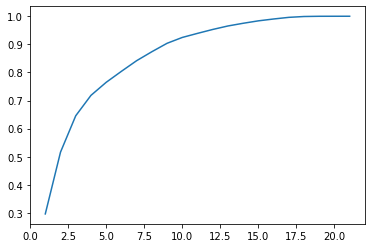

In [94]:
plt.plot(ii,elbow)

In [98]:
X_train, X_test, y_train, y_test = train_test_split(iq, liq, test_size = 0.2, random_state = 0)

sc = StandardScaler()
 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
pca = PCA(n_components = 10)
X_train =pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
X_train.shape

(416, 10)

array([[ 1.43807639, -0.14038411, -0.82616452, ..., -0.03489958,
         0.82521631, -0.32721918],
       [ 1.69745014, -0.13954177,  3.24694796, ...,  0.16846982,
         1.30064336, -0.42137716],
       [ 2.4173368 ,  3.9220442 ,  1.16721873, ..., -0.42625284,
        -0.07196314, -0.2466022 ],
       ...,
       [ 4.277609  ,  0.25386121, -0.66533125, ..., -0.95733414,
         0.55461056, -0.84237613],
       [-1.15547085,  6.04197268,  1.74642247, ..., -0.60670797,
         0.14085432, -0.00961531],
       [-2.18676019, -0.49849988, -1.31772844, ...,  0.36565108,
        -0.8200854 ,  0.0483757 ]])